<a href="https://colab.research.google.com/github/lurivasm/1000House/blob/master/prueba2may.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
dirty_data = pd.read_csv('/content/drive/MyDrive/TFG/timestamp_flows_net_may21.txt', delimiter=',', header=None)
print(dirty_data)

Mounted at /content/drive
                    0      1                   2    3
0          1619820145      3           0.0.0.0/1  tcp
1          1619820145     28           0.0.0.0/1  udp
2          1619820145   2817           0.0.0.0/4  tcp
3          1619820145  34057           0.0.0.0/4  udp
4          1619820145   2819           0.0.0.0/7  tcp
...               ...    ...                 ...  ...
132261891  1622498120      1      217.224.0.0/12  tcp
132261892  1622498120      1      217.240.0.0/12  udp
132261893  1622498120      1      217.240.0.0/12  tcp
132261894  1622498120      1      217.240.0.0/14  tcp
132261895  1622498120      3  217.243.205.192/29  udp

[132261896 rows x 4 columns]


In [45]:
# Agrupamos por subredes y sumamos los flujos totales
top_max = 10
top_subnets = np.array(dirty_data.groupby(2, as_index=False)[1].sum().sort_values(by=1, ascending=False)[2][:top_max])

# Filtramos el dataset original con el top de subredes con más flujos
data = dirty_data[(dirty_data[2].isin(top_subnets)) & (dirty_data[3] == 'tcp')]
print(data)

                    0       1                 2    3
2          1619820145    2817         0.0.0.0/4  tcp
1577       1619820145  465880      51.77.2.0/25  tcp
3228       1619820145    2426   81.47.204.48/28  tcp
3763       1619820145   66824     83.48.96.0/19  tcp
9226       1619820145    1476   185.156.73.0/24  tcp
...               ...     ...               ...  ...
132258567  1622498120  339081  194.224.110.0/26  tcp
132258879  1622498120   44802    195.55.74.0/24  tcp
132260426  1622498120    1599    213.0.43.32/28  tcp
132260583  1622498120    1024    213.4.28.64/27  tcp
132260626  1622498120   77216   213.4.30.192/28  tcp

[83739 rows x 4 columns]


In [46]:
# Dividimos en training (1-23 octubre) y test (23-31 octubre)
from datetime import datetime

# Indexamos los nombres de las subredes para que sean int y poder usar la red
list_index = list(data[2].drop_duplicates(keep='first'))

# Para que no salte el warning de copias
data = data.copy()
data[2] = data[2].apply(lambda x: list_index.index(x))

#list_index = list(data[3].drop_duplicates(keep='first'))
#data[3] = data[3].apply(lambda x: list_index.index(x))
#data[7] = data[0] + data[1]
data[0] = data[0].apply(lambda x: datetime.fromtimestamp(x))

# Nuevas columnas con día de la semana y hora, minuto, segundo
# (de momento dia del mes no pues solo tenemos octubre)
data[3] = data[0].apply(lambda x: x.weekday())
data[4] = data[0].apply(lambda x: x.hour)
data[5] = data[0].apply(lambda x: x.minute)

#data[6] = data[0].apply(lambda x: x.second)
print(data)

                            0       1  2  3   4   5
2         2021-04-30 22:02:25    2817  0  4  22   2
1577      2021-04-30 22:02:25  465880  1  4  22   2
3228      2021-04-30 22:02:25    2426  2  4  22   2
3763      2021-04-30 22:02:25   66824  3  4  22   2
9226      2021-04-30 22:02:25    1476  4  4  22   2
...                       ...     ... .. ..  ..  ..
132258567 2021-05-31 21:55:20  339081  5  0  21  55
132258879 2021-05-31 21:55:20   44802  6  0  21  55
132260426 2021-05-31 21:55:20    1599  7  0  21  55
132260583 2021-05-31 21:55:20    1024  8  0  21  55
132260626 2021-05-31 21:55:20   77216  9  0  21  55

[83739 rows x 6 columns]


In [47]:
# Usamos el 24 de octubre para separar train de test
date_val = datetime(2021, 5, 24)
date_test = datetime(2020, 10, 28)

train_set = np.array(data[data[0] < date_val])
train_set = train_set[:,1:].astype(float)

test_set = np.array(data[data[0] >= date_val])
test_set = test_set[:,1:].astype(float)

In [48]:
mean = train_set.mean(axis=0)
train_set -= mean
std = train_set.std(axis=0)
train_set /= std
test_set -= mean
test_set /= std

In [49]:
x_train = train_set[:-1,:]
y_train = train_set[1:,0]

x_test = test_set[:-1,:]
y_test = test_set[1:,0]

print(train_set[:5,:])
print(x_train.shape)
print(y_train.shape)
print(x_train)
print(y_train)
num_input = x_train.shape[-1]

[[-0.45191373 -1.63636602  0.37819295  1.51011374 -1.52173242]
 [ 2.20380495 -1.28444317  0.37819295  1.51011374 -1.52173242]
 [-0.45415616 -0.93252031  0.37819295  1.51011374 -1.52173242]
 [-0.08482635 -0.58059746  0.37819295  1.51011374 -1.52173242]
 [-0.45960452 -0.22867461  0.37819295  1.51011374 -1.52173242]]
(63603, 5)
(63603,)
[[-0.45191373 -1.63636602  0.37819295  1.51011374 -1.52173242]
 [ 2.20380495 -1.28444317  0.37819295  1.51011374 -1.52173242]
 [-0.45415616 -0.93252031  0.37819295  1.51011374 -1.52173242]
 ...
 [-0.29372211  0.4751711   1.35657839  1.65427623  1.60555866]
 [-0.45062907  0.82709396  1.35657839  1.65427623  1.60555866]
 [-0.46262119  1.17901681  1.35657839  1.65427623  1.60555866]]
[ 2.20380495 -0.45415616 -0.08482635 ... -0.45062907 -0.46262119
 -0.10172199]


In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.utils.vis_utils import plot_model

epochs = 15
batch_size = 10
# Perceptron de 3 capas
# Primero intentamos que todas las capas tengan el mismo número de neuronas que de inputs el modelo
model = Sequential()

model.add(Dense(7, input_dim=num_input, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# Para crear una foto resumen 
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

model.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'mae', 'mape', 'cosine_proximity'])

# Epochs:
# Batch_size:
#history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

evaluation = model.evaluate(x_train, y_train)
#print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 7)                 42        
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 8         
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
6361/6361 [==============================] - 13s 2ms/step - loss: 0.9225 - mse: 0.9225 - mae: 0.6373 - mape: 149.9374 - cosine_proximity: -0.5081 - val_loss: 0.3632 - val_mse: 0.3632 - val_mae: 0.4938 - val_mape: 111.7078 - val_cosine_proximity: -0.2898
Epoch 2/15
6361/6361 [==============================] - 14s 2ms/step - loss: 0.7356 - mse: 0.7356 - mae: 0.5442 - ma

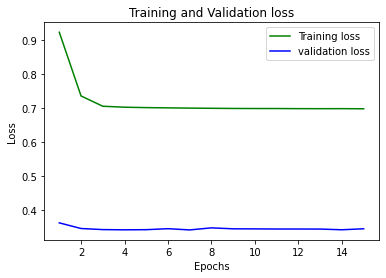

In [51]:
import matplotlib.pyplot as plt

# training loss vs. validation loss over the number of epochs

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs_array = range(1,epochs+1)
plt.plot(epochs_array, loss_train, 'g', label='Training loss')
plt.plot(epochs_array, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

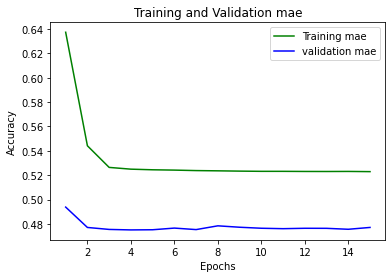

In [52]:
loss_train = history.history['mae']
loss_val = history.history['val_mae']
plt.plot(epochs_array, loss_train, 'g', label='Training mae')
plt.plot(epochs_array, loss_val, 'b', label='validation mae')
plt.title('Training and Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

X=[-0.44371252 -1.63636602 -1.57857793 -1.66146124 -1.57964522], Predicted=[1.12748165e-32], Expected=-0.4564559405096354
X=[-0.45645594 -0.93252031 -1.57857793 -1.66146124 -1.57964522], Predicted=[1.5146494e-15], Expected=0.29000917601534265
X=[ 0.29000918 -0.58059746 -1.57857793 -1.66146124 -1.57964522], Predicted=[0.99996275], Expected=-0.46549447876453803
X=[-0.46549448 -0.22867461 -1.57857793 -1.66146124 -1.57964522], Predicted=[0.00267828], Expected=0.794492665262968
X=[ 0.79449267  0.12324825 -1.57857793 -1.66146124 -1.57964522], Predicted=[0.00031993], Expected=-0.2945364921906844
X=[-0.29453649  0.4751711  -1.57857793 -1.66146124 -1.57964522], Predicted=[8.93771e-33], Expected=-0.4493329300321042
X=[-0.44933293  0.82709396 -1.57857793 -1.66146124 -1.57964522], Predicted=[0.], Expected=-0.4629824992241527
X=[-0.4629825   1.17901681 -1.57857793 -1.66146124 -1.57964522], Predicted=[0.], Expected=-0.09209273466542489
X=[-0.09209273  1.53093966 -1.57857793 -1.66146124 -1.57964522],

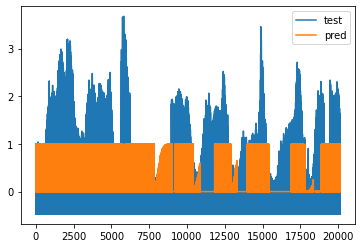

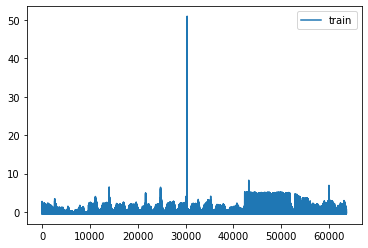

In [53]:
# make a prediction
y_pred = model.predict(x_test)
# show the inputs and predicted outputs
for i in range(10):
	print("X=%s, Predicted=%s, Expected=%s" % (x_test[i], y_pred[i], y_test[i]))
 
import matplotlib.pyplot as plt
plt.plot(y_test, label='test')
plt.plot(y_pred, label='pred')
plt.legend()
plt.show()
plt.plot(y_train, label='train')
plt.legend()
plt.show()